In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-comments-dataset/YoutubeCommentsDataSet.csv


In [2]:
df = pd.read_csv("/kaggle/input/youtube-comments-dataset/YoutubeCommentsDataSet.csv")

In [3]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [5]:
df.isnull().sum()

Comment      44
Sentiment     0
dtype: int64

In [6]:
# Remover valores NaN na coluna 'Comment'
df = df.dropna(subset=['Comment'])

In [7]:
sns.set_style("whitegrid")

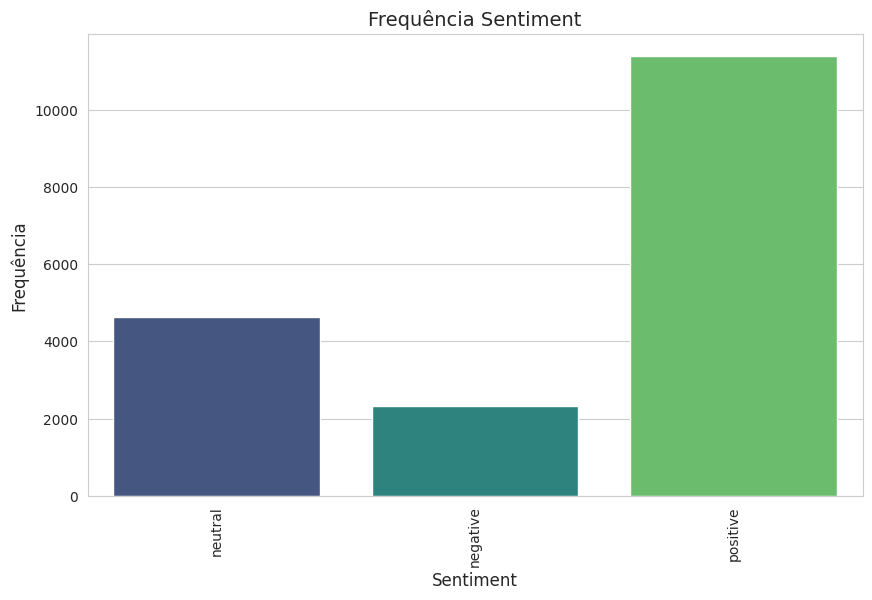

Frequência da coluna Sentimentos
  Sentiment  Frequência
0  positive       11402
1   neutral        4625
2  negative        2337


In [8]:
# Cria o gráfico de contagem
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Frequência Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=90)
plt.show()
# Conta a frequência dos valores na coluna
qtd = df['Sentiment'].value_counts().reset_index(name='Frequência').rename(columns={'index': 'Sentiment'})
# Imprime as frequências
print('Frequência da coluna Sentimentos')
print(qtd)

# Vamos analisar os comentários no dataset e fazer uma previsão estatística sobre as palavras mais frequentes em cada tipo de sentimento.

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [10]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
def preprocess_text(text):
    # Verifica se o texto é uma string, caso contrário retorna uma string vazia
    if not isinstance(text, str):
        return []
    
    # Converte o texto para minúsculas
    text = text.lower()
    
    # Tokeniza o texto
    words = word_tokenize(text)
    
    # Remove palavras de parada (stopwords) e mantém apenas palavras alfanuméricas
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalnum() and word not in stop_words]
    
    return words

# Aplicando a função preprocess_text à coluna 'Comment'
df['processed_comments'] = df['Comment'].apply(preprocess_text)


In [12]:
sentiment_words = df.groupby('Sentiment')['processed_comments'].apply(lambda x: [word for words in x for word in words])

In [13]:
def get_most_common_words(words_list, top_n=10):
    word_counts = Counter(words_list)
    return word_counts.most_common(top_n)

# Criar uma lista para armazenar as palavras mais comuns para cada sentimento
most_common_words = {}
for sentiment, words in sentiment_words.items():
    most_common_words[sentiment] = get_most_common_words(words)

# Exibindo as palavras mais frequentes para cada sentimento
for sentiment, word_count in most_common_words.items():
    print(f"Sentimento: {sentiment}")
    for word, count in word_count:
        print(f"  {word}: {count}")


Sentimento: negative
  like: 429
  people: 372
  one: 281
  would: 267
  get: 248
  even: 242
  dont: 228
  time: 218
  im: 214
  know: 213
Sentimento: neutral
  de: 706
  like: 579
  que: 464
  one: 460
  time: 366
  get: 344
  would: 331
  video: 325
  know: 313
  2: 293
Sentimento: positive
  love: 1960
  like: 1623
  video: 1500
  thank: 1440
  great: 1367
  really: 1291
  one: 1274
  much: 1175
  good: 1145
  im: 1059


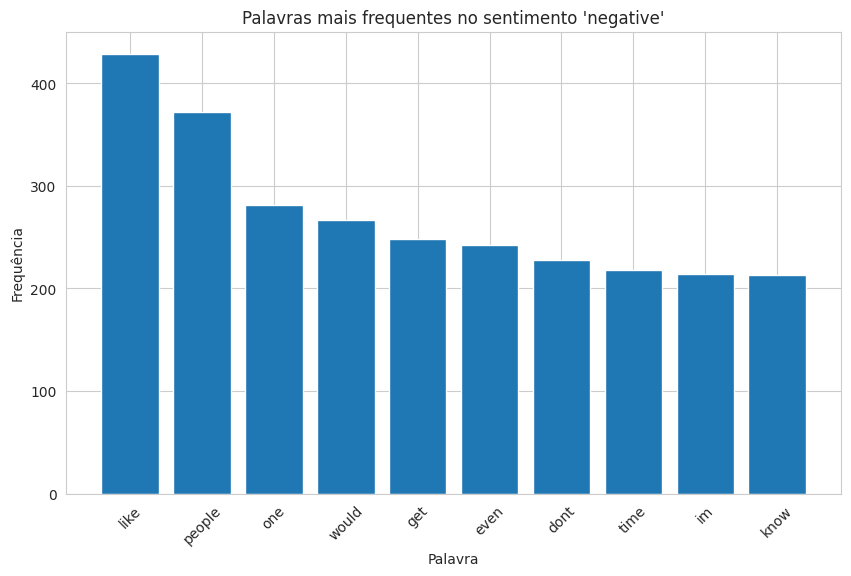

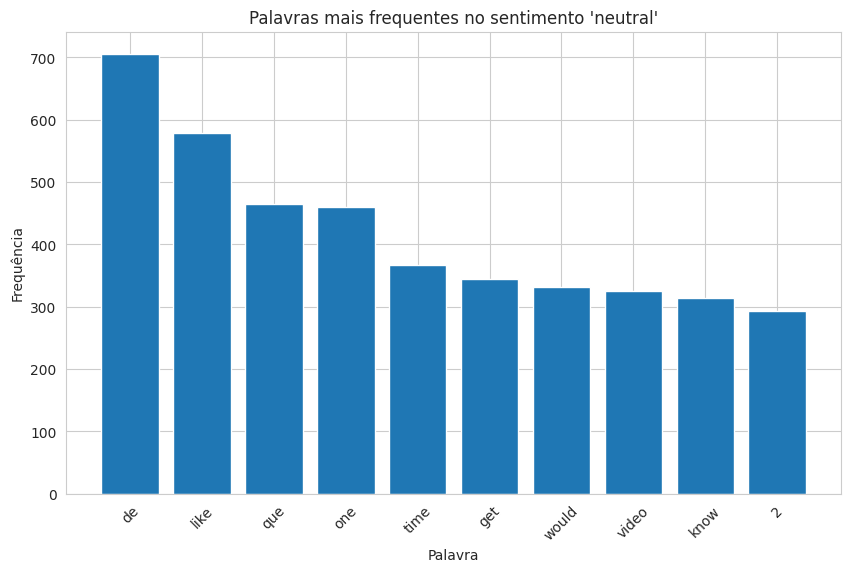

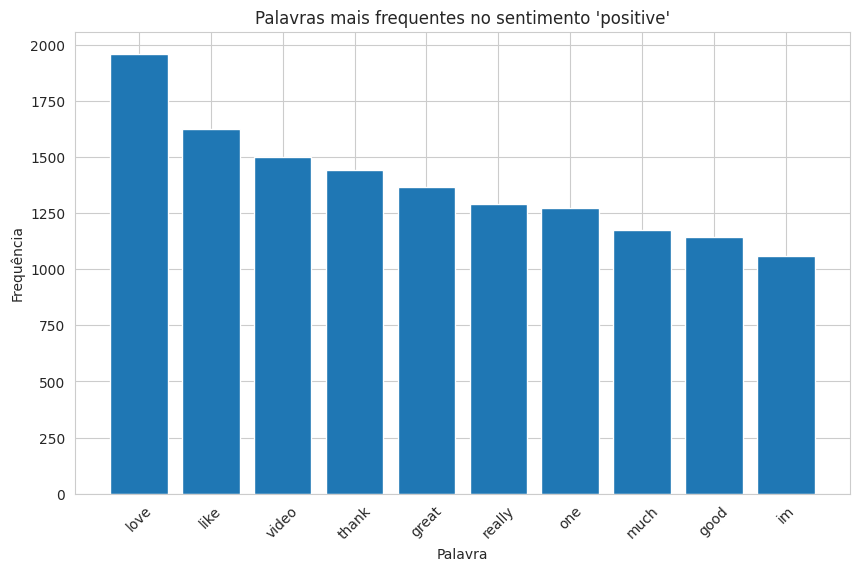

In [14]:
for sentiment, word_count in most_common_words.items():
    words, counts = zip(*word_count)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(f"Palavras mais frequentes no sentimento '{sentiment}'")
    plt.xlabel("Palavra")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.show()

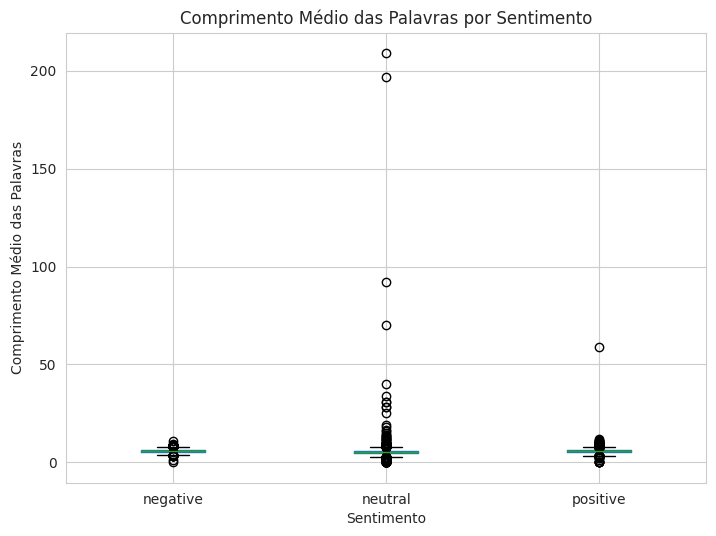

In [15]:
# Contando o comprimento médio das palavras em cada comentário
df['word_lengths'] = df['processed_comments'].apply(lambda x: [len(word) for word in x])
df['avg_word_length'] = df['word_lengths'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# Boxplot para comprimento médio das palavras por Sentimento
df.boxplot(column='avg_word_length', by='Sentiment', figsize=(8, 6))
plt.title('Comprimento Médio das Palavras por Sentimento')
plt.suptitle('')
plt.xlabel('Sentimento')
plt.ylabel('Comprimento Médio das Palavras')
plt.show()

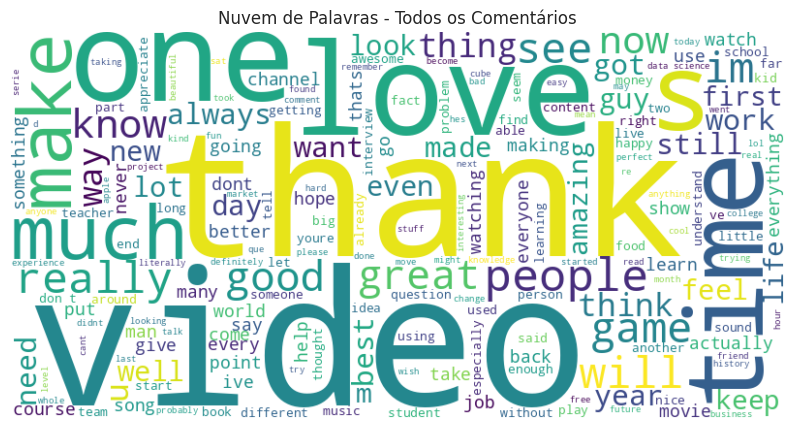

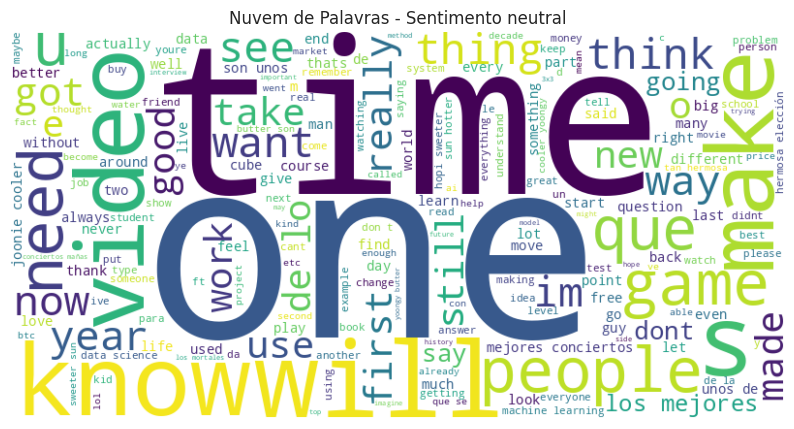

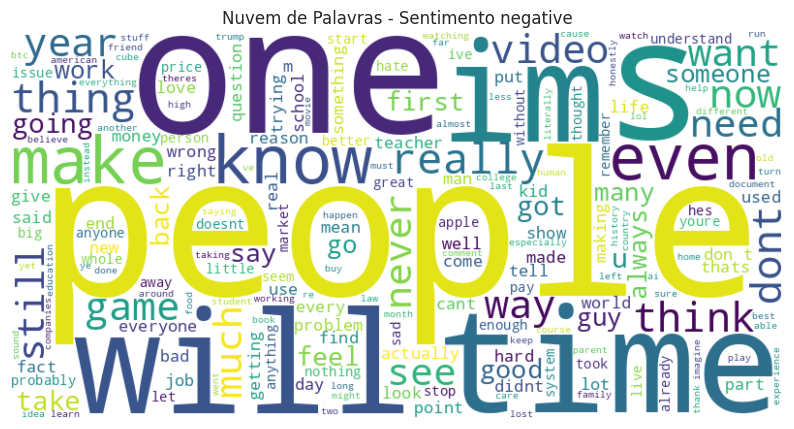

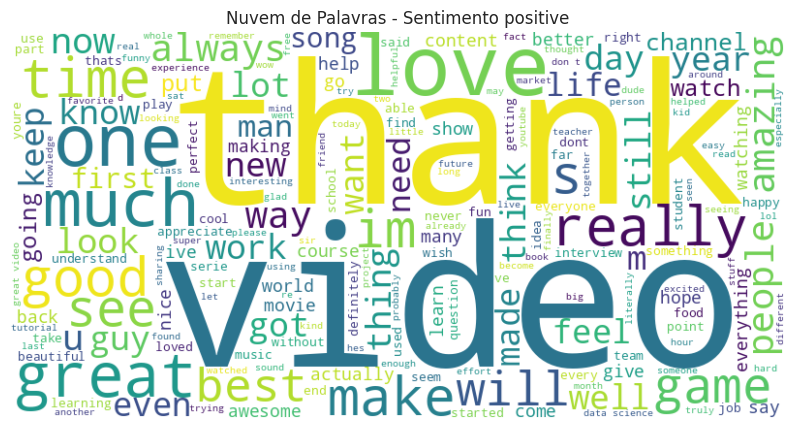

In [16]:
from wordcloud import WordCloud

all_comments = ' '.join(df['Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de Palavras - Todos os Comentários")
plt.show()

# Nuvem de palavras por Sentimento
for sentiment in df['Sentiment'].unique():
    sentiment_comments = ' '.join(df[df['Sentiment'] == sentiment]['Comment'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_comments)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvem de Palavras - Sentimento {sentiment}")
    plt.show()

# ML
Para classificar

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [18]:
# Preparando os dados
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Sentiment'], test_size=0.3, random_state=42)

# Vetorização de texto usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Treinando o modelo
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Prevendo e avaliando o modelo
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.83      0.01      0.01       679
     neutral       0.73      0.18      0.29      1375
    positive       0.65      0.98      0.78      3456

    accuracy                           0.66      5510
   macro avg       0.74      0.39      0.36      5510
weighted avg       0.69      0.66      0.56      5510

